In [1]:
import imageio
import matplotlib.pyplot as plt

In [2]:
colin = imageio.imread('colinCalifornie.jpg')

In [3]:
hauteur,largeur,nbCouleurs = colin.shape
hauteur,largeur

(760, 1140)

In [4]:
colin[0][0]

Array([151, 163,  63], dtype=uint8)

In [5]:
colin[0][0][0]

151

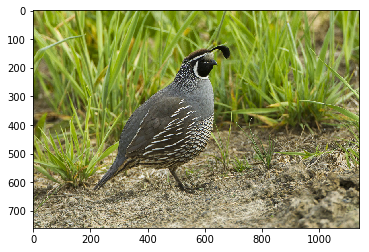

In [6]:
plt.imshow(colin)

In [7]:
colin2 = colin.copy()

In [8]:
for i in range(760): 
    for j in range(1140): 
        colin2[i][j][1]=0

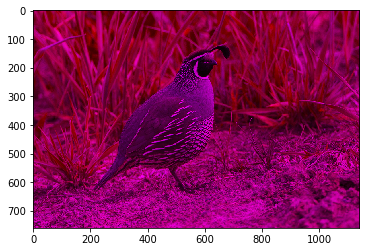

In [9]:
plt.imshow(colin2)

In [10]:
imageio.imsave('colinRouge.jpg',colin2)

http://www.easyrgb.com/en/math.php#text20 fournit les conversions RVB/TSL

La conversion RVB -> TSL est complexe, mais, dans le cas où S = 0, la conversion TSL -> RVB se simplifie en $$R = V = B = L * 255.$$

D'autre part, si on veut juste la composante L d'une couleur RVB, il suffit d'écrire
$$L={\min(R,V,B)+\max(R,V,B)\over2\times 255}.$$

Autrement dit, annuler la saturation revient à calculer $G={\min(R,V,B)+\max(R,V,B)\over2}$ et à remplacer $(R,V,B)$ par $(G,G,G)$.

In [11]:
colinGris1 = colin.copy()
colinGris2 = colin.copy()

In [12]:
def enGris1(image):
    hauteur,largeur,nc = image.shape
    for i in range(hauteur):
        for j in range(largeur):
            r,v,b = image[i][j][0],image[i][j][1],image[i][j][2]
            g = int(r/3+v/3+b/3)
            image[i][j][0],image[i][j][1],image[i][j][2] = g,g,g

In [13]:
def enGris2(image):
    hauteur,largeur,nc = image.shape
    for i in range(hauteur):
        for j in range(largeur):
            r,v,b = image[i][j][0],image[i][j][1],image[i][j][2]
            g = int(min(r,v,b)/2+max(r,v,b)/2)
            image[i][j][0],image[i][j][1],image[i][j][2] = g,g,g    

In [14]:
enGris1(colinGris1)

In [15]:
enGris2(colinGris2)

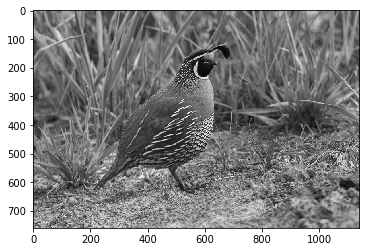

In [16]:
plt.imshow(colinGris1)

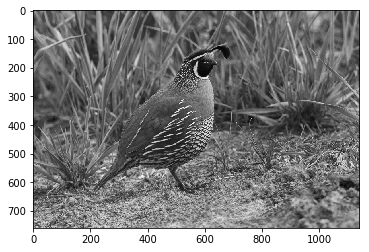

In [17]:
plt.imshow(colinGris2)

In [18]:
def contours(image,seuil=20):
    c = image.copy()
    hauteur,largeur,nc = image.shape
    for i in range(hauteur):
        for j in range(largeur-1):
            r,v,b = int(image[i][j][0]),int(image[i][j][1]),int(image[i][j][2])
            rr,vv,bb = int(image[i][j+1][0]),int(image[i][j+1][1]),int(image[i][j+1][2])
            d = abs(r-rr)+abs(v-vv)+abs(b-bb)
            if d > seuil:
                c[i][j]=[0,0,0]
            else:
                c[i][j]=[255,255,255]
    return c

In [19]:
colinC1 = contours(colin)

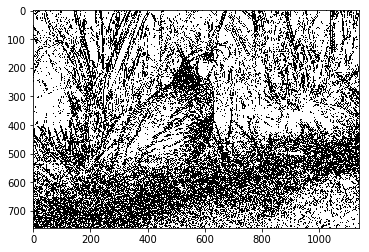

In [20]:
plt.imshow(colinC1)

In [21]:
colinC2 = contours(colin,50)

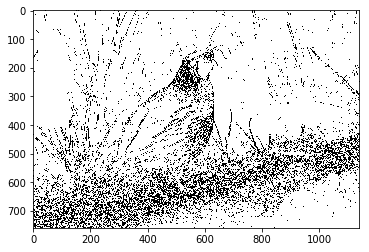

In [22]:
plt.imshow(colinC2)

In [23]:
colinC3 = contours(colin,150)

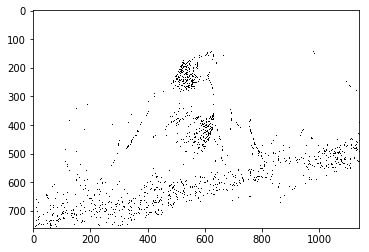

In [24]:
plt.imshow(colinC3)